In [101]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [102]:
df=pd.read_csv("worldometer_data.csv")

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [104]:
df

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [105]:
df.isna().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [106]:
df1=df.drop(["NewCases","NewDeaths","NewRecovered"],axis=1)

In [107]:
df1 = df1.fillna(df.mode().iloc[0])

In [108]:
df1.head()

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,14606.0,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [109]:
df1.describe()

,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,2.090000e+02,2.090000e+02,209.000000,2.090000e+02,2.090000e+02,209.000000,209.000000,209.000000,2.090000e+02,209.000000
mean,3.026996e+07,9.171850e+04,3411.617225,5.775245e+04,2.713487e+04,312.358852,3180.770335,88.925263,1.281753e+06,79359.172249
std,1.045351e+08,4.325867e+05,14728.970729,2.543467e+05,1.729872e+05,1583.753010,5184.182955,167.884540,5.322241e+06,146743.354760
min,8.010000e+02,1.000000e+01,1.000000,7.000000e+00,0.000000e+00,1.000000,3.000000,0.080000,6.100000e+01,4.000000
25%,8.970950e+05,7.120000e+02,12.000000,3.080000e+02,7.400000e+01,1.000000,279.000000,6.000000,1.080800e+04,10731.000000
50%,6.942854e+06,4.491000e+03,70.000000,2.010000e+03,8.580000e+02,2.000000,1000.000000,20.000000,1.099460e+05,30546.000000
75%,2.552886e+07,3.689600e+04,600.000000,1.959600e+04,7.113000e+03,41.000000,3806.000000,80.000000,6.924300e+05,75521.000000
max,1.381345e+09,5.032179e+06,162804.000000,2.576668e+06,2.292707e+06,18296.000000,39922.000000,1238.000000,6.313960e+07,995282.000000


<Axes: xlabel='Continent', ylabel='count'>

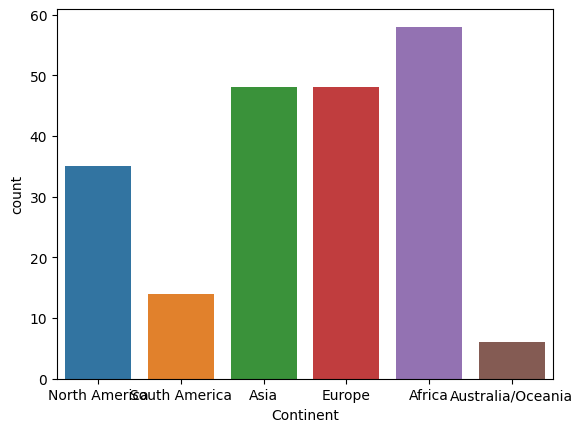

In [110]:
sns.countplot(x="Continent",data=df1)

In [111]:
df1.isna().sum()

Country/Region      0
Continent           0
Population          0
TotalCases          0
TotalDeaths         0
TotalRecovered      0
ActiveCases         0
Serious,Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
WHO Region          0
dtype: int64

<Axes: >

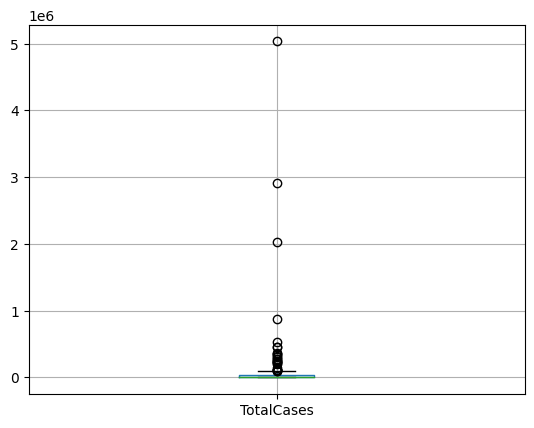

In [112]:
df1.boxplot(column="TotalCases")

<Axes: xlabel='TotalTests'>

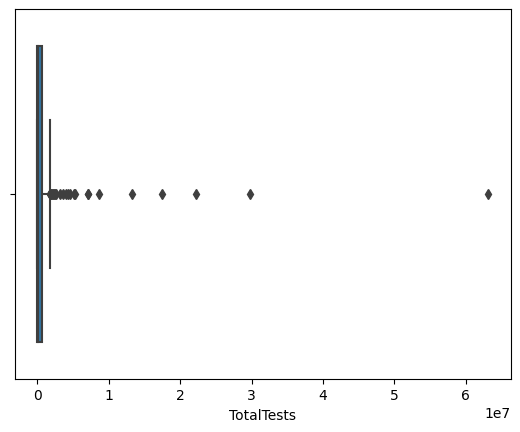

In [113]:
sns.boxplot(x="TotalTests",data=df1)

In [114]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [115]:
low,upp=remove_outlier(df1['TotalTests'])
df1['TotalTests']=np.where(df1['TotalTests']>upp,upp,df1['TotalTests'])
df1['TotalTests']=np.where(df1['TotalTests']<low,low,df1['TotalTests'])

<Axes: >

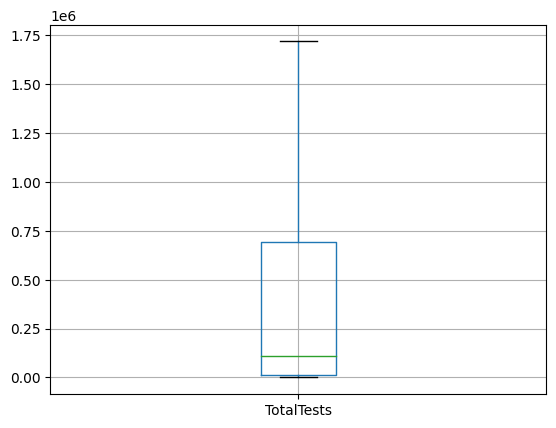

In [116]:
df1.boxplot(column="TotalTests")

In [117]:
low,upp=remove_outlier(df1['TotalCases'])
df1['TotalCases']=np.where(df1['TotalCases']>upp,upp,df1['TotalCases'])
df1['TotalCases']=np.where(df1['TotalCases']<low,low,df1['TotalCases'])

<Axes: >

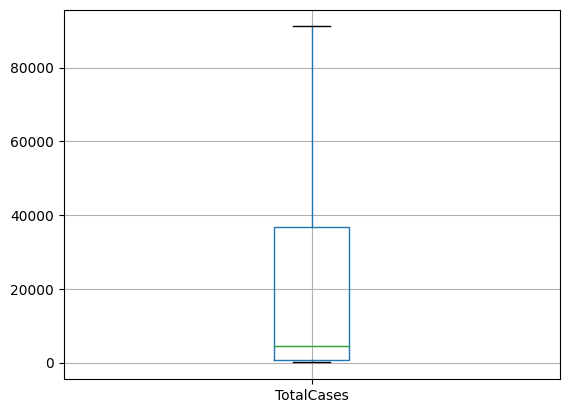

In [118]:
df1.boxplot(column="TotalCases")

<Axes: xlabel='Continent', ylabel='TotalDeaths'>

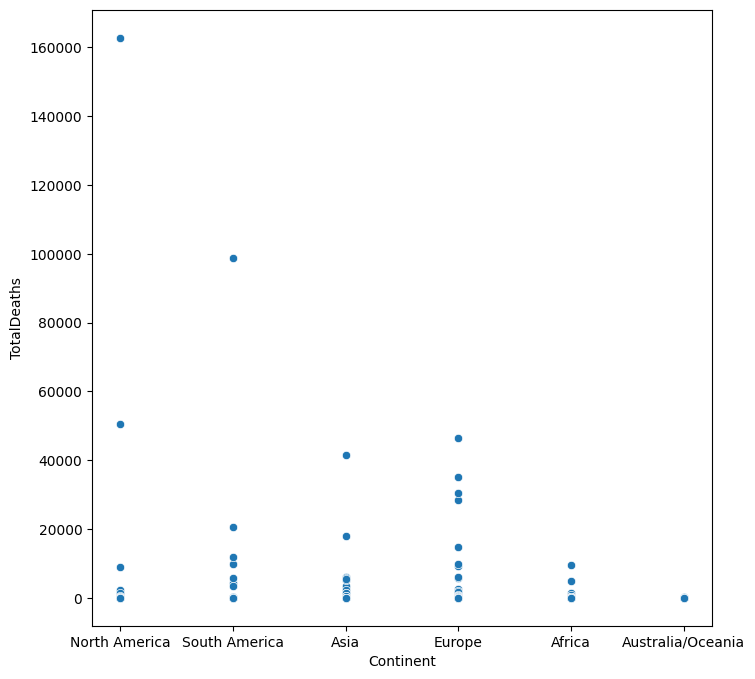

In [129]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x="Continent",y="TotalDeaths",data=df1,ax=ax)

C:\Users\sunka\AppData\Local\Temp\ipykernel_7772\3324109747.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1["Deaths/1M pop"])


<Axes: xlabel='Deaths/1M pop', ylabel='Density'>

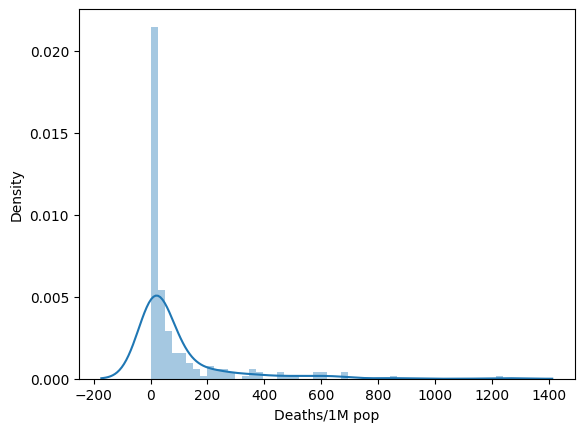

In [120]:
sns.distplot(df1["Deaths/1M pop"])

<Axes: xlabel='Continent', ylabel='TotalDeaths'>

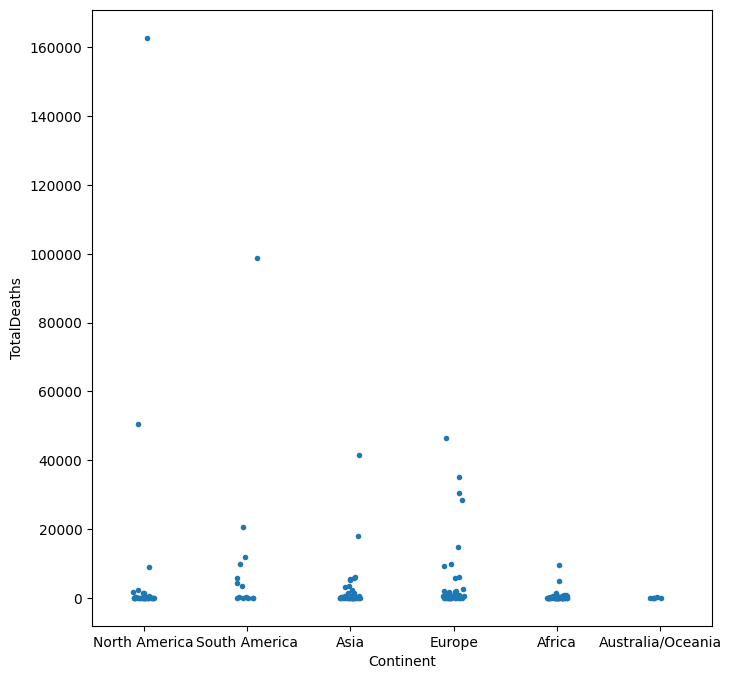

In [121]:
fig, ax = plt.subplots(figsize=(8,8))
sns.stripplot(x='Continent',y='TotalDeaths',data=df1,ax=ax,size=4)

In [122]:
df.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


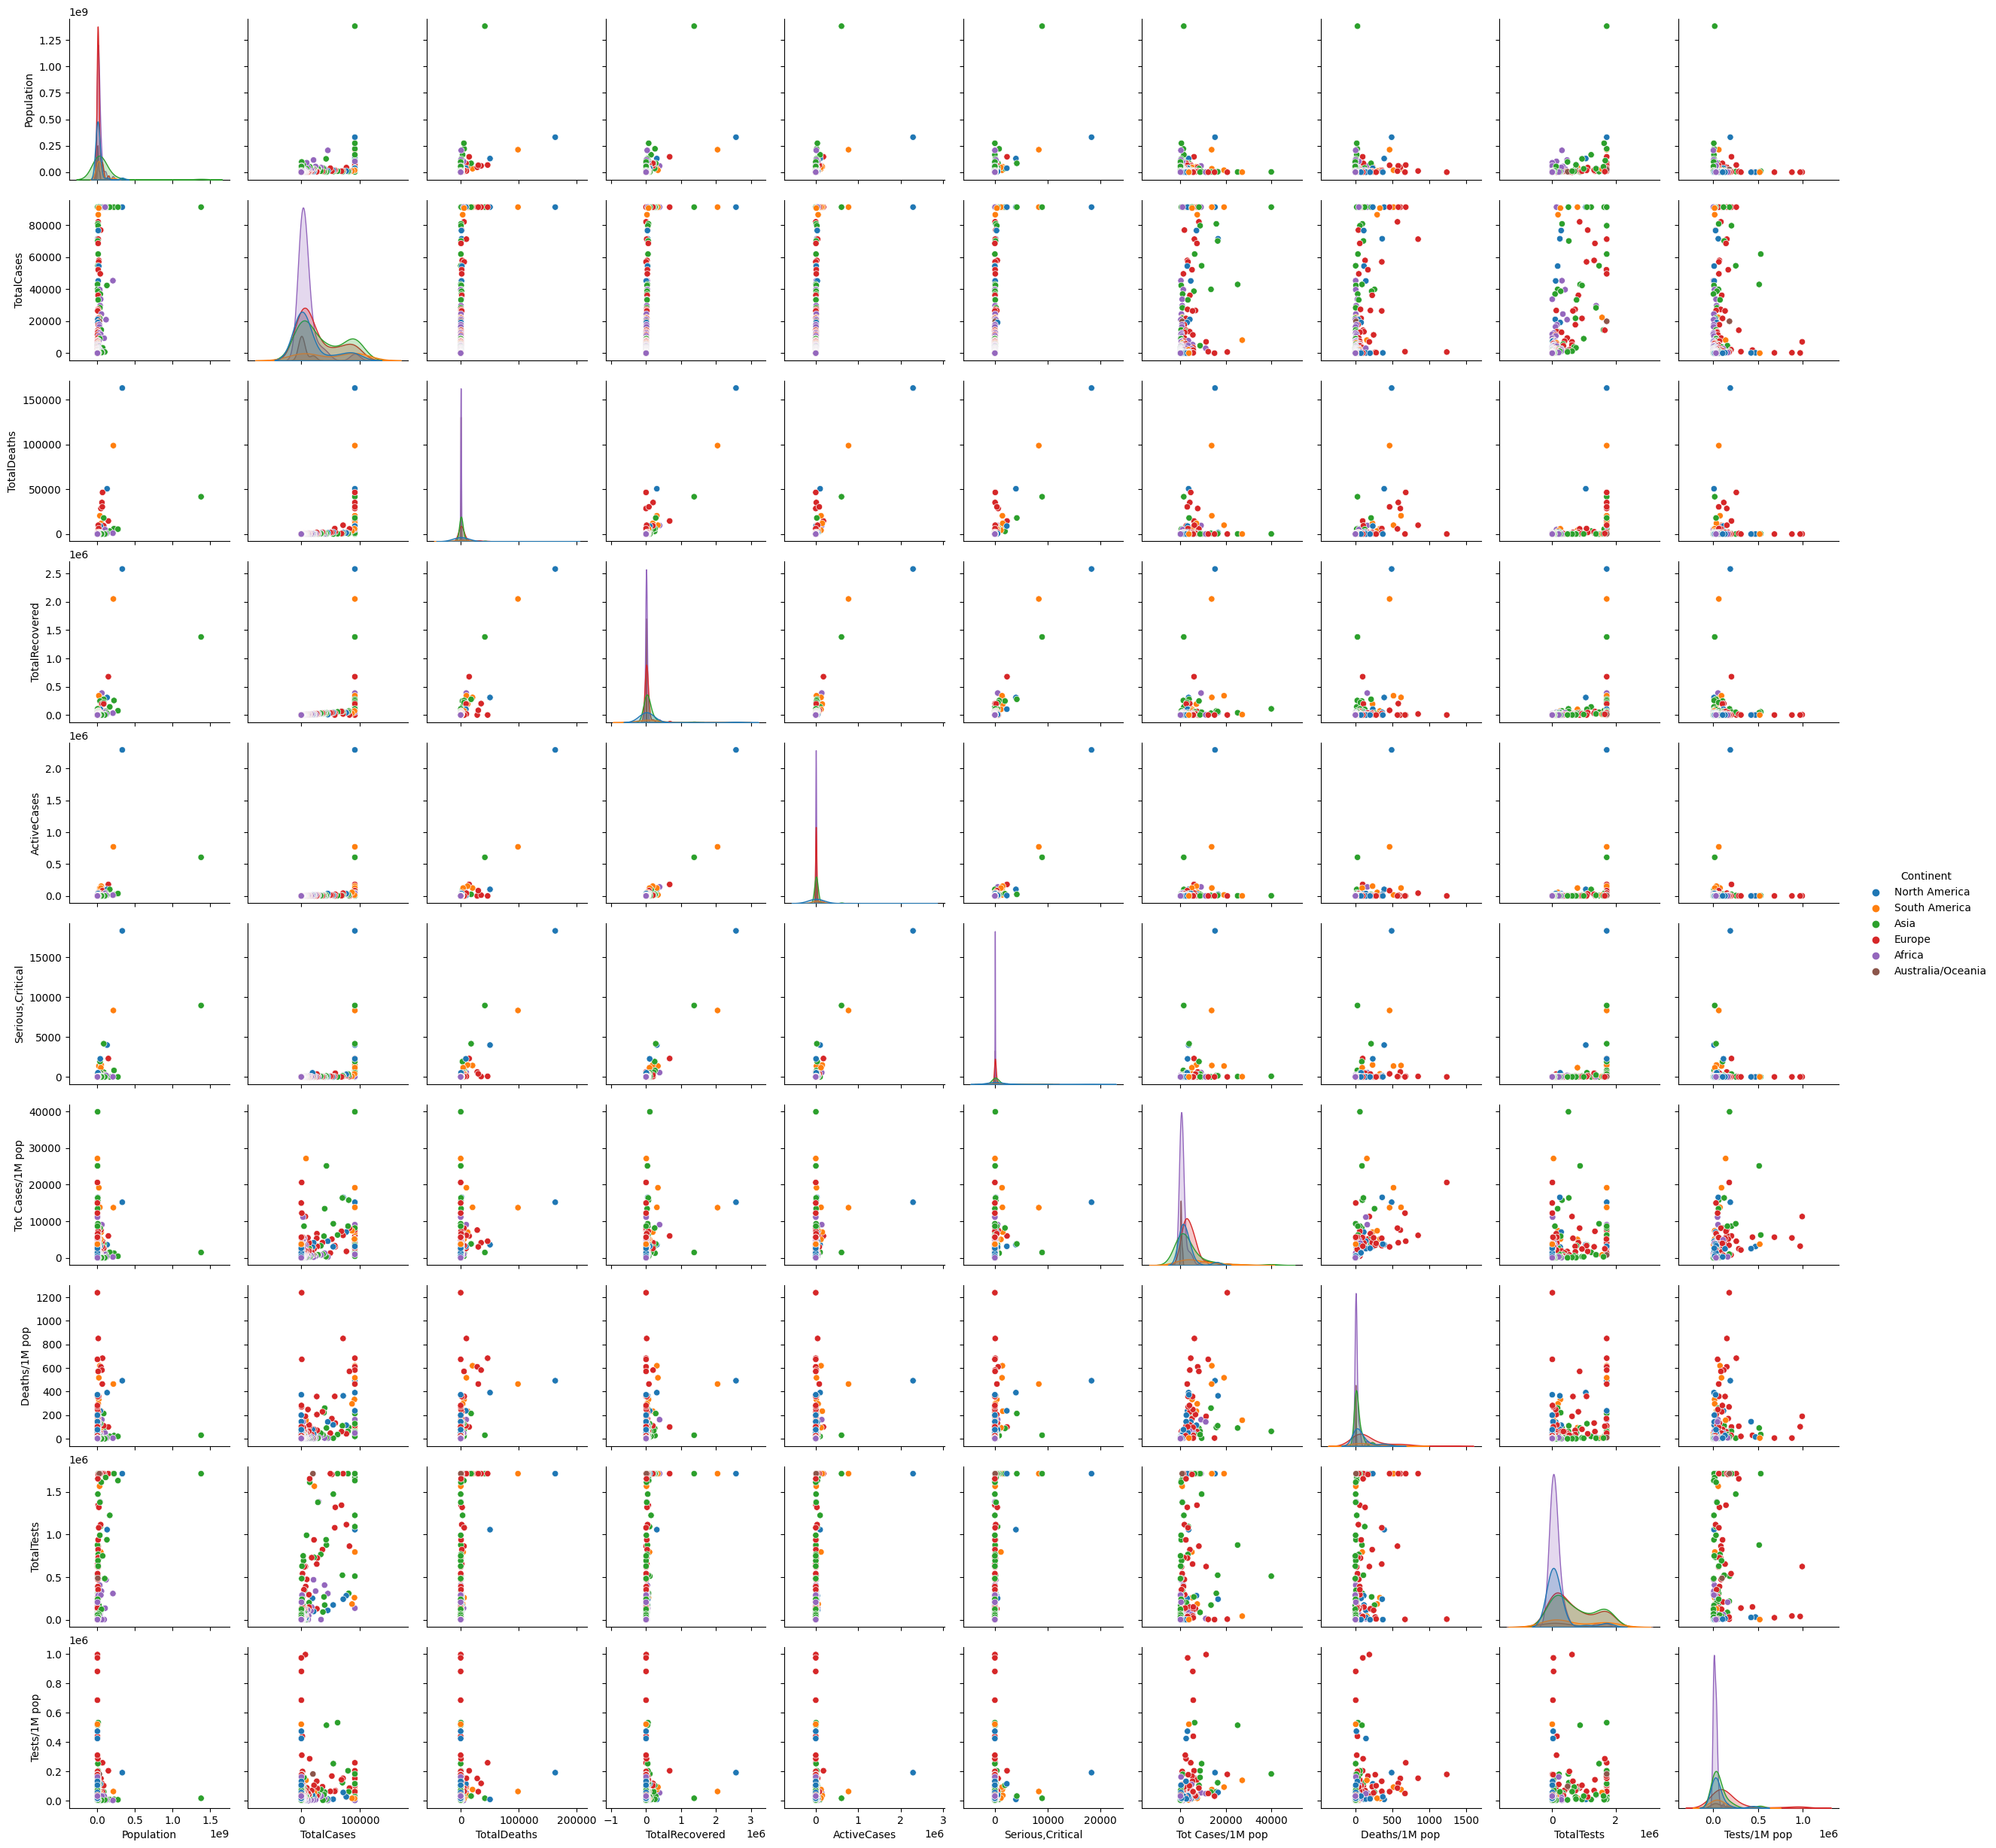

In [123]:
sns.pairplot(df1,hue="Continent")

In [124]:
df2=df1.drop(["Country/Region","Continent","WHO Region"],axis=1)

<Axes: >

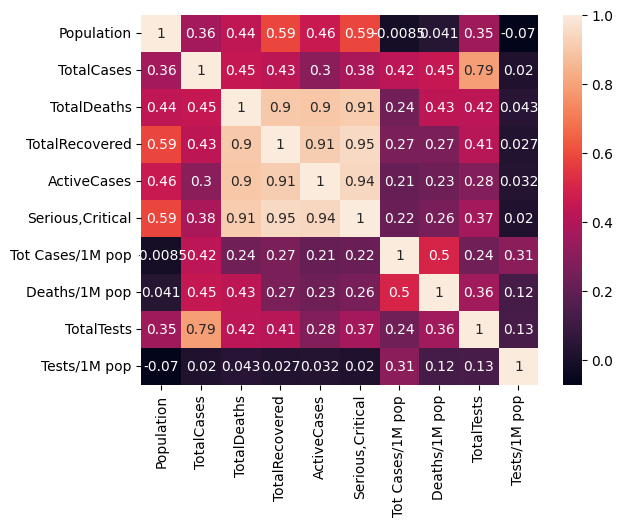

In [125]:
sns.heatmap(df2.corr(),annot=True)

<Axes: xlabel='Continent', ylabel='TotalCases'>

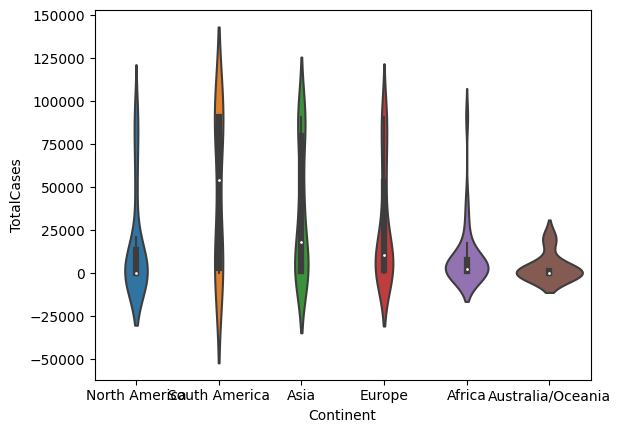

In [126]:
sns.violinplot(y="TotalCases",x="Continent",data=df1)